In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from IPython.display import display
import seaborn as sns
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.io import curdoc, output_file
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
from bokeh.layouts import row
from bokeh.models import Legend
import plotly.express as px
import requests
import json
import plotly.io as pio

## Initializing the data

In [ ]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

In [2]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

C:\Users\miran\AppData\Local\Temp\ipykernel_28488\2640694134.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


In [ ]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['Month'] = pd.to_datetime(data['CRASH DATE']).dt.month
data['Day'] = pd.to_datetime(data['CRASH DATE']).dt.day

## Initial plots to determine the direction

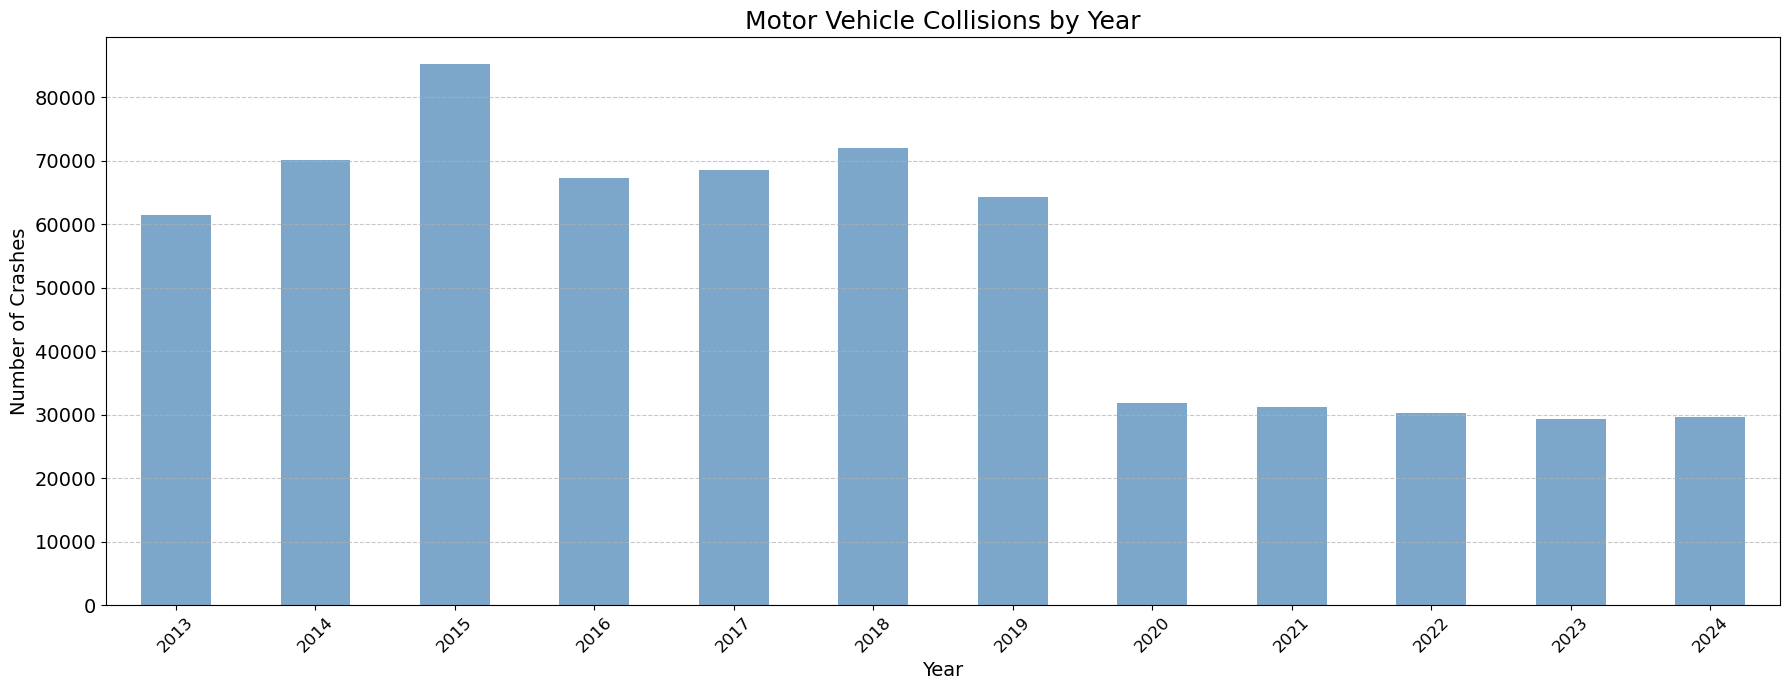

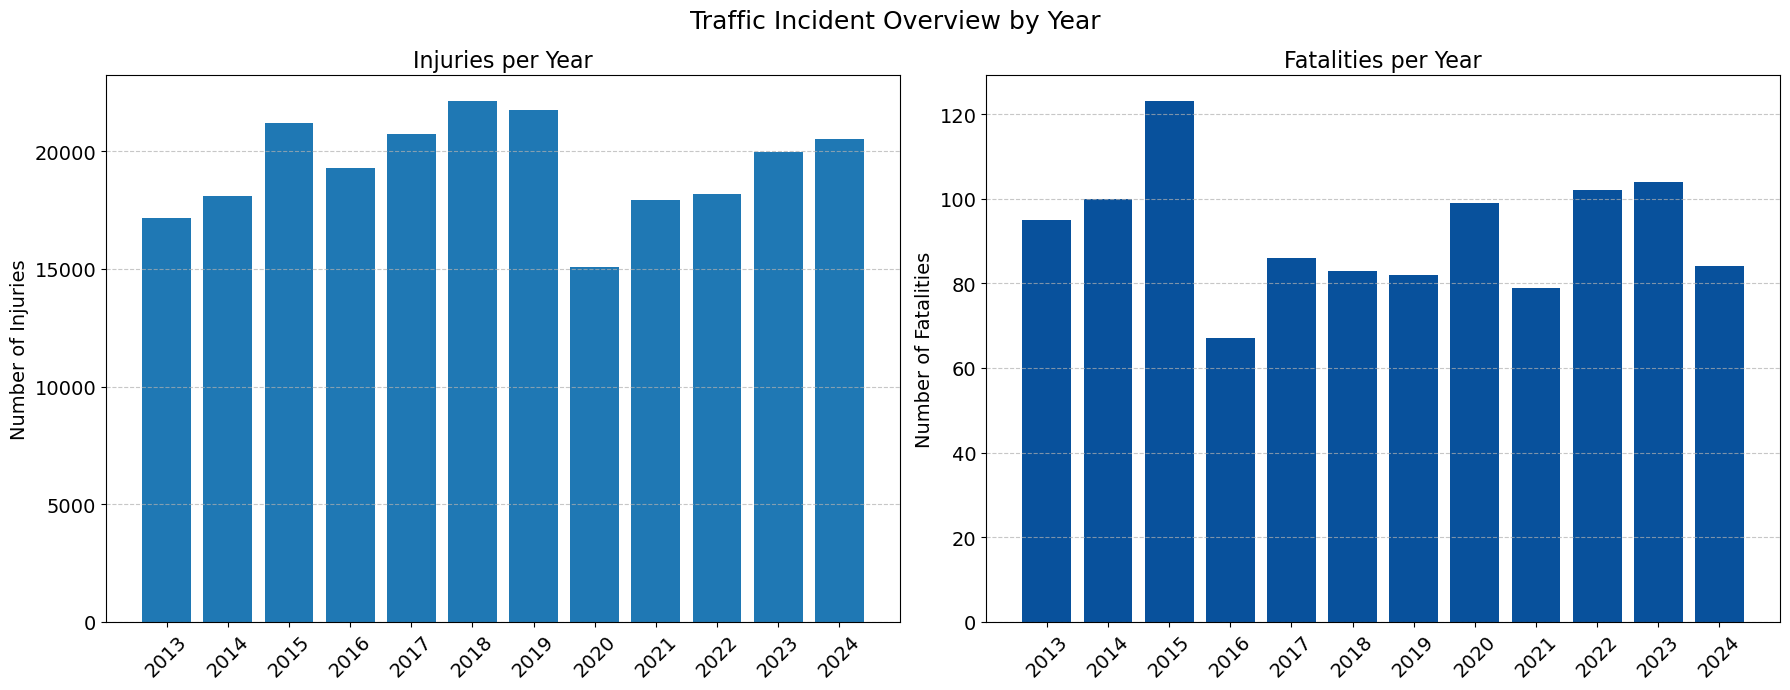

In [3]:
# Data processing
crashes = data['Year'].value_counts().sort_index()
injuries = data['NUMBER OF PERSONS INJURED'].groupby(data['Year']).sum()
fatalities = data['NUMBER OF PERSONS KILLED'].groupby(data['Year']).sum()

years = sorted(data['Year'].unique())  # sorted years
x = np.arange(len(years))  # x locations

plt.figure(figsize=(18, 7))
data['Year'].value_counts().sort_index().plot(kind='bar', color='#4682b4', alpha=0.7, fontsize=14)
plt.title('Motor Vehicle Collisions by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# Save the figure
plt.savefig('motor_vehicle_collisions_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

# Create horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# Plot each category
axes[0].bar(x, injuries, color='#1f78b4')
axes[0].set_title('Injuries per Year', fontsize=16)
axes[0].set_ylabel('Number of Injuries', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(years, rotation=45, fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # <--- Grid here

axes[1].bar(x, fatalities, color='#08519c')
axes[1].set_title('Fatalities per Year', fontsize=16)
axes[1].set_ylabel('Number of Fatalities', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(years, rotation=45, fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # <--- Grid here

# Overall title and layout
fig.suptitle('Traffic Incident Overview by Year', fontsize=18)
plt.tight_layout()  # leave space for title
#Save the figure
plt.savefig('traffic_incidents_overview.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\miran\AppData\Local\Temp\ipykernel_28488\4282396197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


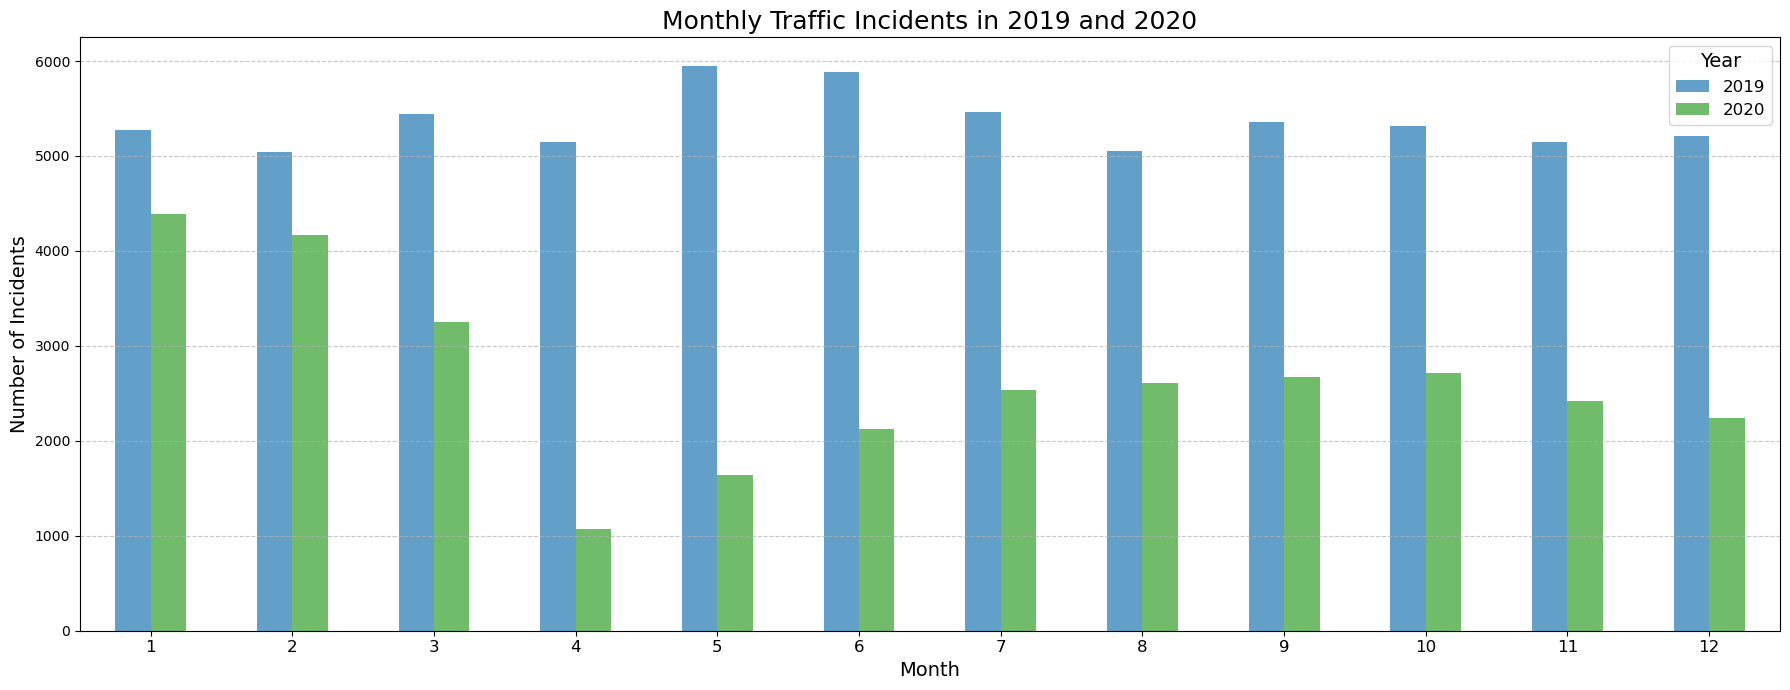

In [4]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Traffic Incidents in 2019 and 2020', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

C:\Users\miran\AppData\Local\Temp\ipykernel_28488\2999473314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


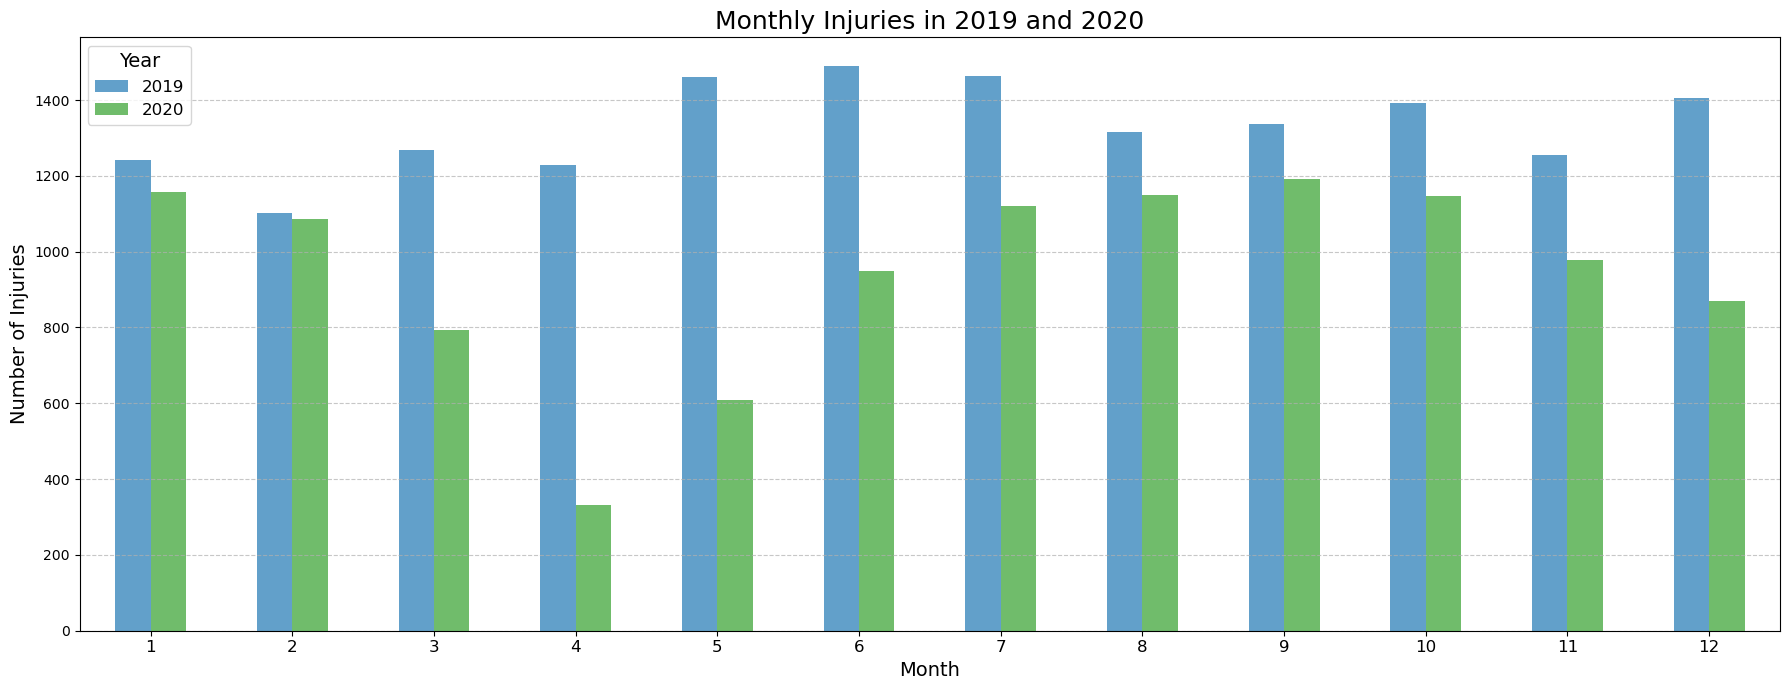

In [5]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

data_19_20_in = data_19_20[data_19_20['NUMBER OF PERSONS INJURED'] > 0]

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20_in.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Injuries in 2019 and 2020', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

C:\Users\miran\AppData\Local\Temp\ipykernel_28488\1262953389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


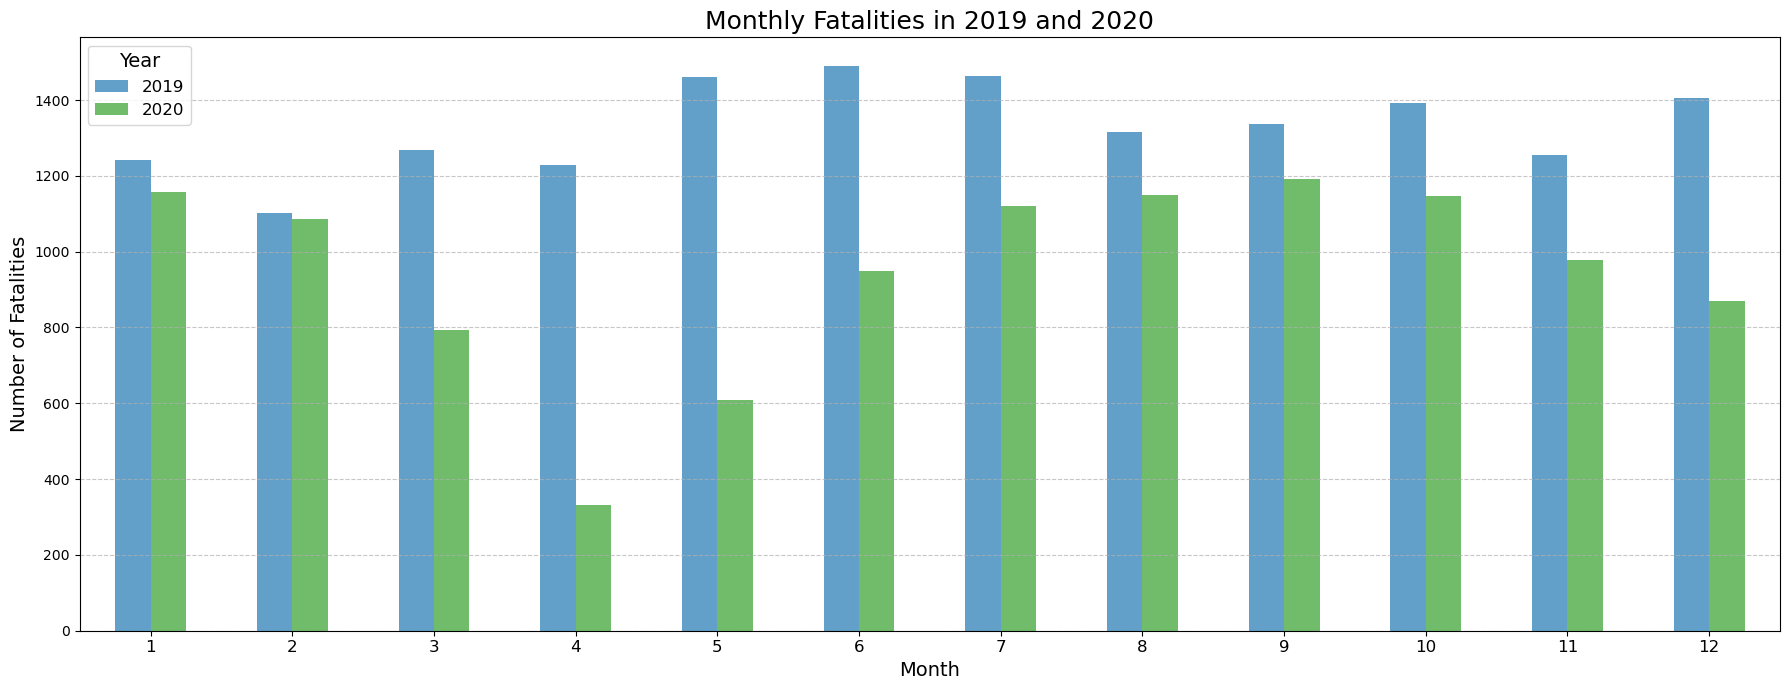

In [6]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

data_19_20_fa = data_19_20[data_19_20['NUMBER OF PERSONS INJURED'] > 0]

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20_fa.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Fatalities in 2019 and 2020', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

## Collision Density plot

In [ ]:
data_2019 = data[data['Year'] == 2019]
data_2020 = data[data['Year'] == 2020]

# Suppress SettingWithCopyWarning by using .loc
data_2019.loc[:, 'DayOfWeek'] = data_2019['CRASH DATE'].dt.day_name()
data_2019.loc[:, 'Hour'] = pd.to_datetime(data_2019['CRASH TIME'], format='%H:%M').dt.hour

# Extract day of week and hour
data_2019['DayOfWeek'] = data_2019['CRASH DATE'].dt.day_name()
data_2019['Hour'] = pd.to_datetime(data_2019['CRASH TIME'], format='%H:%M').dt.hour

# Pivot table for 2019
heatmap_data_2019 = data_2019.pivot_table(index='DayOfWeek', columns='Hour', values='COLLISION_ID', aggfunc='count').fillna(0)

# Sort days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data_2019 = heatmap_data_2019.reindex(days_order)

# Extract day of week and hour
data_2020['DayOfWeek'] = data_2020['CRASH DATE'].dt.day_name()
data_2020['Hour'] = pd.to_datetime(data_2020['CRASH TIME'], format='%H:%M').dt.hour

# Pivot table for 2020
heatmap_data_2020 = data_2020.pivot_table(index='DayOfWeek', columns='Hour', values='COLLISION_ID', aggfunc='count').fillna(0)

# Sort days properly
heatmap_data_2020 = heatmap_data_2020.reindex(days_order)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.heatmap(heatmap_data_2019, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Collision Density by Day of Week and Hour (2019)')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Day of Week')

sns.heatmap(heatmap_data_2020, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Collision Density by Day of Week and Hour (2020)')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('collision_density_2019_2020.png', dpi=300)
plt.show()


## Contributing factor

In [ ]:
curdoc().theme = "caliber"

output_file(filename="Interactive_Crashes_by_Contributing_Factor.html", title="Crashes by Year and Factor")

# Find the 10 most common contributing factors
top_factors = (data['CONTRIBUTING FACTOR VEHICLE 1']
               .value_counts()
               .head(10)
               .index
               .tolist())

# Filter the dataset to only include the top 10 factors
data_bokeh = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors)]

# Group by Year and Contributing Factor, and count
data_bokeh = data_bokeh.groupby(['Year', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Pivot the data so each contributing factor becomes a column
data_pivot = data_bokeh.pivot(index='Year', columns='CONTRIBUTING FACTOR VEHICLE 1', values='Count').fillna(0).reset_index()

# Sort by Year
data_pivot = data_pivot.sort_values('Year')

# Convert Year to string for categorical x-axis
data_pivot['Year'] = data_pivot['Year'].astype(str)

# Create the ColumnDataSource
data_source = ColumnDataSource(data_pivot)

# Create the figure with categorical x-axis
years = data_pivot['Year'].tolist()
p = figure(x_range=years, title='Crashes by Year and Contributing Factor', height=600, width=900)

# Choose palette - extend if needed
palette = Category10[10]

# Add bars for each contributing factor
bars = []
for index, factor in enumerate(top_factors):
    bar = p.vbar(
        x='Year',
        top=factor,
        source=data_source,
        legend_label=factor,
        color=palette[index % len(palette)],
        width=0.9,
        name=factor,
        alpha=0.7
    )
    bars.append(bar)

# Hover tool
hover = HoverTool(tooltips=[
    ("Contributing Factor", "$name"),
    ("Year", "@Year"),
    ("Number of Crashes", "@$name"),
])
p.add_tools(hover)

# Axis labels
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Number of Crashes'
p.xaxis.formatter = NumeralTickFormatter(format="0")

# Move legend
# Remove old legend
p.legend.visible = False

# Create a new Legend object
legend = Legend(items=[
    (name, [renderer]) for name, renderer in zip(top_factors, bars)
], location="center")

legend.title = "Contributing Factor"
legend.click_policy = "hide"

# Add the legend manually
p.add_layout(legend, 'right')

# Show plot
output_notebook()
show(p)

# Optional: print top factors
print(f"Top 10 Contributing Factors: {top_factors}")


## Crashes by Borough

In [ ]:
# Filter data for 2019 and 2020
df = data[data['Year'].isin([2019, 2020])]

# Count crashes by borough and year
crashes_by_borough_year = df.groupby(['Year', 'BOROUGH']).size().reset_index(name='value')
crashes_by_borough_year['BOROUGH'] = crashes_by_borough_year['BOROUGH'].str.title()  # Standardize borough names
crashes_by_borough_year.rename(columns={'BOROUGH': 'borough'}, inplace=True)

geojson_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/new-york-city-boroughs.geojson"
geojson_data = requests.get(geojson_url).json()

# Plotting with animation
fig = px.choropleth(
    crashes_by_borough_year,
    geojson=geojson_data,
    locations='borough',
    featureidkey='properties.name',  # This is the GeoJSON field that matches the borough name
    color='value',
    color_continuous_scale="Viridis",
    range_color=(0, crashes_by_borough_year['value'].max()),
    scope="usa",
    hover_name='borough',
    hover_data=['Year'],
    # Add animation frame
    animation_frame='Year',  # Add animation by year
    labels={'value': 'Crashes'},
    title='Crashes by Borough (2019 and 2020)',
)

fig.update_geos(fitbounds="locations", visible=False)  

# Save the figure as an HTML file
pio.write_html(fig, file="crashes_by_borough.html", auto_open=True)

## Heatmap

In [11]:
map_data = data.copy()

map_data['Month'] = pd.to_datetime(map_data['CRASH DATE']).dt.month
map_data = map_data[(map_data['Month'] == 9)]
map_data['Hour'] = pd.to_datetime(map_data['CRASH TIME'], format='%H:%M').dt.hour
map_data = map_data[(map_data['Hour'] < 19) & (map_data['Hour'] > 14)]
hours = sorted(map_data['Hour'].unique())  # sorted hours
map_data = map_data[(map_data['NUMBER OF PERSONS INJURED'] > 0) | (map_data['NUMBER OF PERSONS KILLED'] > 0)]

map_data_2019 = map_data[map_data['Year'] == 2019]
map_data_2020 = map_data[map_data['Year'] == 2020]

# Ensure latitude and longitude are floats
map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)

map_data_2020['LATITUDE'] = map_data_2020['LATITUDE'].astype(float)
map_data_2020['LONGITUDE'] = map_data_2020['LONGITUDE'].astype(float)

map19 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
map20 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

heat_data_19 = [
    map_data_2019[map_data_2019['Hour'] == hour][['LATITUDE', 'LONGITUDE']].values.tolist()
    for hour in hours
]

heat_data_20 = [
    map_data_2020[map_data_2020['Hour'] == hour][['LATITUDE', 'LONGITUDE']].values.tolist()
    for hour in hours
]

# Add the HeatMapWithTime layer
plugins.HeatMapWithTime(
    heat_data_19,
    index=hours,         # labels for the time slider
    auto_play=True,
    max_opacity=0.8,
    radius=10,
    use_local_extrema=False
).add_to(map19)

# Add the HeatMapWithTime layer
plugins.HeatMapWithTime(
    heat_data_20,
    index=hours,         # labels for the time slider
    auto_play=True,
    max_opacity=0.8,
    radius=10,
    use_local_extrema=False
).add_to(map20)

#Display the maps
display(map19)
display(map20)

#Save the map to an HTML file
map19.save('heatmap_2019.html')
map20.save('heatmap_2020.html')

C:\Users\miran\AppData\Local\Temp\ipykernel_28488\1630899691.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
C:\Users\miran\AppData\Local\Temp\ipykernel_28488\1630899691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)
C:\Users\miran\AppData\Local\Temp\ipykernel_28488\1630899691.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from